<h3> <b>Process 5: Data Modeling & Evaluating</b> </h3>

<hr/>

<h4> <b>Install & Import</b> </h4>

Install & Import the necessary libraries.

In [438]:
# Install libraries
!pip install category_encoders


[notice] A new release of pip available: 22.3.1 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [439]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ast
import category_encoders as ce
import datetime
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

<hr/>
<h4> <b>Read data & Create dataframe</b> </h4>

In [440]:
df = pd.read_csv('data/new_data.csv')
df.head()

,jobId,jobTitle,approvedOn,companyName,isAnonymous,isSalaryVisible,jobDescription,jobRequirement,jobLevelId,salary,...,address,industries,jobLevel,jobLevelVI,companySize,languageSelected,prettySalary,durationDays,numOfApplications,typeWorkingName
0,1680760,Nhân Viên Kinh Doanh MT - GT,2023-08-11T11:22:45+07:00,Công Ty Cổ Phần S77 Hà Nội,False,True,1. Doanh số bán hàng\r\n- Thực hiện bán hàng t...,- Ít nhất 1 năm kinh nghiệm ở vị trí tương đươ...,5,700,...,Hà Nội,"{11: 'Customer Service', 32: 'Retail/Wholesale...",Experienced (non-manager),Nhân viên,"(10, 24)",Any,$500 - $700,30,0,Full-time
1,1680765,Social Media Specialist (Full Time/part-Time),2023-08-11T11:20:32+07:00,Công Ty TNHH Jung Wisdom International,False,False,WE’RE HIRING: SOCIAL MEDIA SPECIALIST (FULL TI...,QUALIFICATIONS\r\n- Fluent in English (IELTS o...,5,0,...,"No.298, Vo Chi Cong street, Xuan La Ward, Tay ...","{3: 'Advertising/Promotion/PR', 27: 'Marketing...",Experienced (non-manager),Nhân viên,"(25, 99)",English,Thương lượng,30,0,Full-time
2,1680758,Kế Toán Tổng Hợp,2023-08-11T11:17:28+07:00,Công Ty Cổ Phần S77 Hà Nội,False,True,- Ghi nhận kiểm tra các nghiệp vụ phát sinh và...,1. Tuổi: Từ 25\r\n2. Bằng cấp: Cao đẳng/Đại Họ...,5,700,...,Hà Nội,"{1: 'Accounting', 58: 'Auditing', 59: 'Finance...",Experienced (non-manager),Nhân viên,"(10, 24)",Any,$500 - $700,30,0,Full-time
3,1680741,Marketing Staff,2023-08-11T11:10:02+07:00,Công Ty TNHH Bán Lẻ Fujimart Việt Nam,False,False,"-\tIn charge of trade marketing activities, co...",-\tBachelor degree of Marketing/ Business Admi...,5,0,...,"Tầng 6, 51 Phố Lê Đại Hành, Quận Hai Bà Trưng,...","{3: 'Advertising/Promotion/PR', 27: 'Marketing...",Experienced (non-manager),Nhân viên,"(100, 499)",Any,Thương lượng,30,0,Full-time
4,1680162,Chuyên Viên Chính Quan Hệ Khách Hàng Ưu Tiên -...,2023-08-10T10:43:12+07:00,Ngân Hàng TMCP Quốc Dân (Ncb),False,False,"- Thực hiện hoạt động tìm kiếm, phát triển và ...","- Tốt nghiệp chuyên ngành Tài chính-ngân hàng,...",5,0,...,"28C-28D Bà Triệu, Phường Hàng Bài, Hà Nội","{33: 'Sales', 42: 'Banking', 59: 'Finance/Inve...",Experienced (non-manager),Nhân viên,"(100, 499)",Vietnamese,Thương lượng,30,0,Full-time


##### <i>Because each modeling data will require each different preprocessing data so we will preprocess data previously</i>

<hr/>
<h4> <b>Preprocess data before model data</b> </h4>

In [441]:
temp_df = df.copy()

##### CompanySize

In [442]:
#Chuyển dữ liệu từ dạng object sang numberic
temp_df['companySize'] = temp_df['companySize'].apply(lambda x : np.mean([int(size) for size in str(x).replace('(','').replace(')','').split(',')]) if not isinstance(x, float) else np.nan)

#Bổ sung các giá trị thiếu
median_size = temp_df['companySize'].median()
temp_df['companySize'] = temp_df['companySize'].fillna(median_size)

##### Salary

In [443]:
median_salary = temp_df['salary'].loc[temp_df['salary'] > 0].median()
temp_df['salary'] = temp_df['salary'].replace(to_replace = 0, value = median_salary)

##### numOfApplications

In [444]:
# Column 'numOfApplications' has multiple 0 value so we need to fill out mean value
mean_val = temp_df['numOfApplications'].mean()
temp_df.loc[temp_df['numOfApplications'] == 0, 'numOfApplications'] = int(mean_val)

In [445]:
temp_df.loc[temp_df['salaryMax'] == 0, 'salaryMax'] = temp_df.loc[temp_df['salaryMax'] == 0, 'salaryMin']

In [446]:
# Get all attributes which affect to predict "salary"
temp_df = temp_df[['typeWorkingName','companySize','jobLevel','numOfApplications','languageSelected',\
                    'industries','workingLocations','benefits','skills','salary','approvedOn']]
temp_df 

,typeWorkingName,companySize,jobLevel,numOfApplications,languageSelected,industries,workingLocations,benefits,skills,salary,approvedOn
0,Full-time,17.0,Experienced (non-manager),33,Any,"{11: 'Customer Service', 32: 'Retail/Wholesale...",{24: 'Hà Nội'},"{1: 'Bonus', 2: 'Healthcare Plan', 10: 'Team A...","{1919: 'Kênh MT', 1921: 'Hàng Tiêu Dùng', 666:...",700,2023-08-11T11:22:45+07:00
1,Full-time,62.0,Experienced (non-manager),33,English,"{3: 'Advertising/Promotion/PR', 27: 'Marketing...",{24: 'Hà Nội'},"{1: 'Bonus', 2: 'Healthcare Plan', 4: 'Training'}","{27810: 'Marketing Materials Strategy', 333851...",1000,2023-08-11T11:20:32+07:00
2,Full-time,17.0,Experienced (non-manager),33,Any,"{1: 'Accounting', 58: 'Auditing', 59: 'Finance...",{24: 'Hà Nội'},"{1: 'Bonus', 2: 'Healthcare Plan', 10: 'Team A...","{93: 'Kế Toán Tổng Hợp', 941661: 'Hạch Toán Ch...",700,2023-08-11T11:17:28+07:00
3,Full-time,299.5,Experienced (non-manager),33,Any,"{3: 'Advertising/Promotion/PR', 27: 'Marketing...",{24: 'Hà Nội'},"{1: 'Bonus', 2: 'Healthcare Plan', 9: 'Travel ...","{100: 'English', 651: 'Trade Marketing', 15900...",1000,2023-08-11T11:10:02+07:00
4,Full-time,299.5,Experienced (non-manager),33,Vietnamese,"{33: 'Sales', 42: 'Banking', 59: 'Finance/Inve...",{24: 'Hà Nội'},"{1: 'Bonus', 4: 'Training', 5: 'Awards'}","{17750: 'Tìm Kiếm Khách Hàng', 354: 'Chăm Sóc ...",1000,2023-08-10T10:43:12+07:00
...,...,...,...,...,...,...,...,...,...,...,...
8967,Full-time,749.5,Experienced (non-manager),7,Any,"{8: 'Consulting', 58: 'Auditing', 69: 'Plannin...",{24: 'Hà Nội'},"{1: 'Bonus', 5: 'Awards', 15: 'Others'}","{618943: 'Government Organizations', 236965: '...",1500,2023-07-22T17:06:30+07:00
8968,Full-time,749.5,Experienced (non-manager),7,Any,"{8: 'Consulting', 58: 'Auditing', 69: 'Plannin...",{24: 'Hà Nội'},"{1: 'Bonus', 5: 'Awards', 15: 'Others'}","{618943: 'Government Organizations', 941031: '...",1000,2023-07-22T17:39:57+07:00
8969,Full-time,62.0,Experienced (non-manager),4,Any,"{19: 'Export-Import', 36: 'Freight/Logistics'}",{37: 'Lạng Sơn'},"{2: 'Healthcare Plan', 3: 'Paid Leave', 10: 'T...","{67: 'Xuất Nhập Khẩu', 26367: 'Booking', 23667...",1000,2023-07-22T10:58:26+07:00
8970,Full-time,749.5,Experienced (non-manager),6,Any,"{8: 'Consulting', 11: 'Customer Service', 58: ...",{24: 'Hà Nội'},"{1: 'Bonus', 5: 'Awards', 15: 'Others'}","{9428: 'Chinese', 346516: 'Business Deveplomen...",1000,2023-07-22T16:39:56+07:00


##### approvedOn

In [447]:
newest_date = temp_df['approvedOn'].max()
temp_df['approvedOn'] = temp_df['approvedOn'].apply(lambda x : round((datetime.datetime.fromisoformat(newest_date).timestamp() - datetime.datetime.fromisoformat(x).timestamp())/3600,0))

I found that, these columns like industries, workingLocations, ... (Having dictionary values) need to be in list type to easily handle

The first idea is split it to each column and it will apply to mlp (MultiLabelBinarizer)

Split column

In [448]:
mlb = MultiLabelBinarizer()

In [449]:
encoded_industries = mlb.fit_transform(temp_df['industries'])
encoded_industries_df = pd.DataFrame(encoded_industries, columns=mlb.classes_)

encoded_skills = mlb.fit_transform(temp_df['skills'])
encoded_skills_df = pd.DataFrame(encoded_skills, columns = mlb.classes_)

encoded_workingLocations = mlb.fit_transform(temp_df['workingLocations'])
encoded_workingLocations_df = pd.DataFrame(encoded_workingLocations, columns = mlb.classes_)

encoded_benefits = mlb.fit_transform(temp_df['benefits'])
encoded_benefits_df = pd.DataFrame(encoded_benefits, columns = mlb.classes_)

In [450]:
encoded_1_df = pd.concat([temp_df.reset_index(), encoded_industries_df,encoded_skills_df,\
    encoded_workingLocations_df,encoded_benefits_df],axis = 1)
encoded_1_df = encoded_1_df.drop(['industries','skills','workingLocations','benefits','index'],axis = 1)
encoded_1_df

,typeWorkingName,companySize,jobLevel,numOfApplications,languageSelected,salary,approvedOn,,&,',...,p,r,s,t,u,v,w,y,{,}
0,Full-time,17.0,Experienced (non-manager),33,Any,700,0.0,1,0,1,...,0,1,1,1,1,1,0,0,1,1
1,Full-time,62.0,Experienced (non-manager),33,English,1000,0.0,1,0,1,...,0,1,1,1,1,0,0,0,1,1
2,Full-time,17.0,Experienced (non-manager),33,Any,700,0.0,1,0,1,...,0,1,1,1,1,1,0,0,1,1
3,Full-time,299.5,Experienced (non-manager),33,Any,1000,0.0,1,0,1,...,1,1,1,1,1,1,0,0,1,1
4,Full-time,299.5,Experienced (non-manager),33,Vietnamese,1000,25.0,1,0,1,...,0,1,1,0,1,0,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8967,Full-time,749.5,Experienced (non-manager),7,Any,1500,474.0,1,0,1,...,0,1,1,1,1,0,1,0,1,1
8968,Full-time,749.5,Experienced (non-manager),7,Any,1000,474.0,1,0,1,...,0,1,1,1,1,0,1,0,1,1
8969,Full-time,62.0,Experienced (non-manager),4,Any,1000,480.0,1,0,1,...,0,1,1,1,0,1,0,0,1,1
8970,Full-time,749.5,Experienced (non-manager),6,Any,1000,475.0,1,0,1,...,0,1,1,1,1,0,1,0,1,1


In [451]:
# ohe = OneHotEncoder()
# ohe1_df = pd.DataFrame(ohe.fit_transform(temp_df[['jobLevel']]).toarray(),columns=ohe.categories_)
# ohe2_df = pd.DataFrame(ohe.fit_transform(temp_df[['typeWorkingName']]).toarray(),columns=ohe.categories_)

In [452]:
# encoded_df = encoded_1_df.drop(['typeWorkingName', 'jobLevel', 'languageSelected'],axis = 1)
# encoded_df = pd.concat([encoded_df, ohe1_df.iloc[:,1:],ohe2_df.iloc[:,1:]],axis = 1)
# # encoded_df = encoded_df.drop(['index'],axis = 1)
# encoded_df

In [453]:
encoder = ce.CountEncoder(cols=['jobLevel', 'typeWorkingName','languageSelected'])
encoded = encoder.fit_transform(encoded_1_df)

In [454]:
encoded_df = encoded_1_df.drop(['typeWorkingName', 'jobLevel', 'languageSelected'],axis = 1)
encoded_df = pd.concat([encoded_df, encoded[['jobLevel', 'typeWorkingName','languageSelected']]],axis = 1)
# encoded_df = encoded_df.drop(['index'],axis = 1)
encoded_df

,companySize,numOfApplications,salary,approvedOn,,&,',",",-,/,...,t,u,v,w,y,{,},jobLevel,typeWorkingName,languageSelected
0,17.0,33,700,0.0,1,0,1,1,0,1,...,1,1,1,0,0,1,1,5956,8848,6189
1,62.0,33,1000,0.0,1,0,1,1,0,1,...,1,1,0,0,0,1,1,5956,8848,2223
2,17.0,33,700,0.0,1,0,1,1,0,1,...,1,1,1,0,0,1,1,5956,8848,6189
3,299.5,33,1000,0.0,1,0,1,1,0,1,...,1,1,1,0,0,1,1,5956,8848,6189
4,299.5,33,1000,25.0,1,0,1,1,0,1,...,0,1,0,1,0,1,1,5956,8848,422
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8967,749.5,7,1500,474.0,1,0,1,1,0,1,...,1,1,0,1,0,1,1,5956,8848,6189
8968,749.5,7,1000,474.0,1,0,1,1,0,1,...,1,1,0,1,0,1,1,5956,8848,6189
8969,62.0,4,1000,480.0,1,0,1,1,1,1,...,1,0,1,0,0,1,1,5956,8848,6189
8970,749.5,6,1000,475.0,1,0,1,1,0,0,...,1,1,0,1,0,1,1,5956,8848,6189


##### *Feature Selection*

##### *Feature Selection for Numerical*

In [455]:
numeric_df = encoded_df[['numOfApplications','salary','companySize','approvedOn']]
corr = numeric_df.corr()
corr

,numOfApplications,salary,companySize,approvedOn
numOfApplications,1.000000,0.020938,-0.010881,0.211782
salary,0.020938,1.000000,0.007306,-0.028660
companySize,-0.010881,0.007306,1.000000,0.022777
approvedOn,0.211782,-0.028660,0.022777,1.000000


Using heatmap to describe the correlation between the columns

<AxesSubplot: >

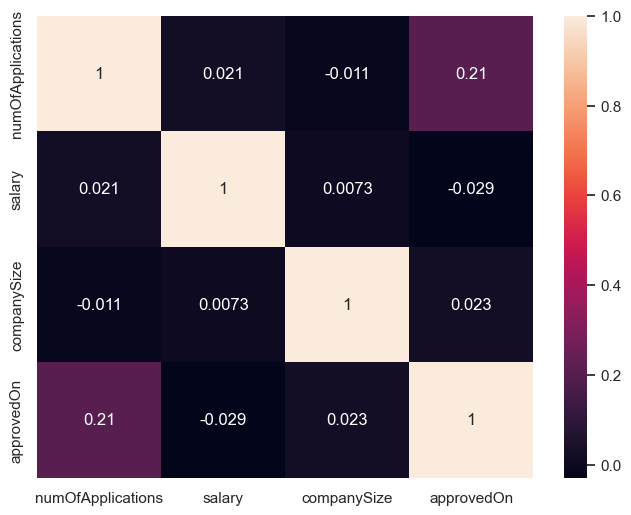

In [456]:
sns.set_theme()
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True)

=> Drop column numofApplications because the correlation between salary and it is very small

##### *Feature Selection for Categorical*

In [457]:
categorical_df = encoded_df.drop(['numOfApplications','salary','companySize','approvedOn'],axis = 1)
target = encoded_df['salary']
chi_scores = chi2(categorical_df, target)
chi_scores

(array([8.02399069e-23, 1.37139074e+02, 8.02399069e-23, 1.08507253e+01,
        2.46348075e+02, 3.29093051e+01, 1.28287079e+02, 1.25242676e+02,
        8.06729049e+01, 1.21017709e+02, 9.34407614e+01, 8.57251680e+01,
        1.03719392e+02, 1.05107867e+02, 1.48299938e+02, 1.19218242e+02,
        8.02399069e-23, 1.82597388e+02, 1.47760529e+02, 1.28342192e+02,
        1.80537484e+02, 1.16727776e+02, 1.37741622e+02, 1.75991124e+02,
        1.45778981e+02, 1.07057124e+02, 6.72220175e+02, 1.42976492e+02,
        1.34517682e+02, 3.20883083e+02, 3.87950976e+02, 1.41728999e+02,
        1.51561335e+02, 1.31398339e+02, 1.59758645e+02, 1.62819734e+02,
        1.59162154e+02, 1.16013556e+02, 1.10786059e+01, 6.72220175e+02,
        5.12104707e+01, 8.69002782e+01, 3.02741963e+00, 3.79745800e+02,
        5.78997234e+01, 1.13273125e+02, 6.00542814e+00, 1.44186958e+02,
        1.91150508e+02, 6.27190191e+01, 8.75680159e+01, 1.93876060e+01,
        2.41889290e+01, 1.13533099e+02, 1.90469799e+01, 4.134855

<AxesSubplot: >

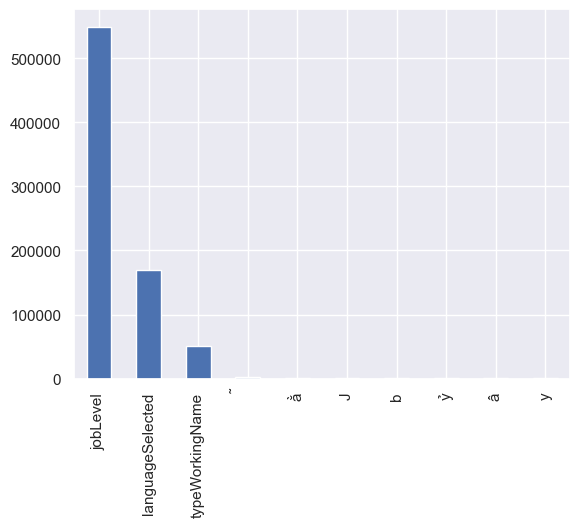

In [458]:
chi_values = pd.Series(chi_scores[0], index=categorical_df.columns)
chi_values = chi_values.sort_values(ascending=False)
chi_values[:10].plot.bar()

<AxesSubplot: >

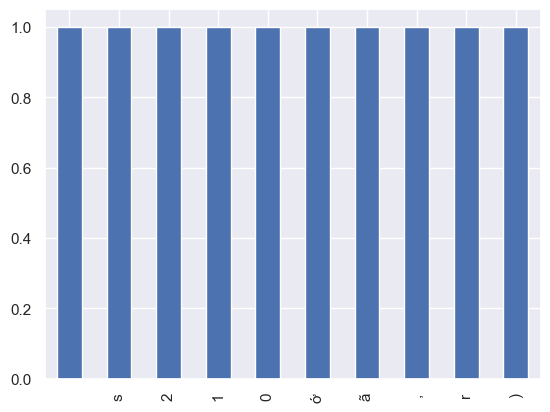

In [459]:
p_values = pd.Series(chi_scores[1], index=categorical_df.columns)
p_values = p_values.sort_values(ascending=False)
p_values[:10].plot.bar()

In [460]:
lower_importance_columns = p_values[p_values.values > 0.05].index.values
lower_importance_columns

array([' ', 's', '2', '1', '0', 'ớ', 'ã', ',', 'r', ')', '(', "'", ' ',
       '4', '}', '{', 'u', '{', 't', '}', "'", 't', 's', 'r', '3', '5',
       'p', '}', 'r', 'o', 'm', 'n', ' ', 'k', 'a', 'i', 'o', '{', 'g',
       '6', 'h', 'i', 'e', 'n', 'o', 'q', ':', '9', '8', '7', 'Â', 'o',
       'n', 'ệ', 'ầ', ',', "'", 'ẳ', 'ằ', 'B', ' ', 'ề', ':', ':', 'ﬁ',
       '{', 'Ề', 'ỳ', 'ỉ', '1', 'Ố', 'ỡ', '/', '}', ',', "'", 'ẫ', '2',
       'a', 'A', 'Ý', 'H', 'e', 'i', 'u', 'e', 'Ă', 'đ', 'Ầ', 'ớ', 'a',
       ':', 'ô', '̀', 'ă', '́', 'c', 'ù', 't', '6', 'y', 'Ấ', 'g', 'r',
       'i', 'S', 'ú', 'C', '̉', 'l', 'c', 'ủ', 'ừ', 'l', 'P', 'ĩ', 'u',
       'D', 'h', 'ả', '8', 'm', 'T', '2', 'ắ', 'ó', 'D', 'ì', 'B', '7',
       'p', '5', 'ậ', 'd', 'm', 'ò', 'e', 'ọ', 'ư', 'ừ', '4', 'j', 'T',
       'c', 'O', 'ơ', 'K', 'v', 'Y', 'á', 'N', 'õ', '2', 's', 'n', 'v',
       '6', '7', 'B', '6', 'I', 'x', 'h', 'P', 'E', 'L', 'd', '&', 'ê',
       'H', 'M', 'h', 'p', 'Ả', 'ở', 'W', 'E', 'y', '9', 'Ẩ', 'ộ

In [461]:
final_df = encoded_df.drop(columns=lower_importance_columns, axis=1)
final_df

,companySize,numOfApplications,salary,approvedOn,J,#,+,.,J,Z,...,ỗ,ụ,Ứ,ỷ,ẵ,ế,ố,jobLevel,typeWorkingName,languageSelected
0,17.0,33,700,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,5956,8848,6189
1,62.0,33,1000,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,5956,8848,2223
2,17.0,33,700,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,5956,8848,6189
3,299.5,33,1000,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,5956,8848,6189
4,299.5,33,1000,25.0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,5956,8848,422
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8967,749.5,7,1500,474.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,5956,8848,6189
8968,749.5,7,1000,474.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,5956,8848,6189
8969,62.0,4,1000,480.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,5956,8848,6189
8970,749.5,6,1000,475.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,5956,8848,6189


<hr/>
<h4> <b>Model & Evaluate data </b> </h4>

In [462]:
y = final_df['salary']
X = final_df.drop(['salary'],axis = 1)

In [463]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state = 0)

##### **=> We will use some algorithm of machine learning such as logistic regression, SVM, RandomForest, MLP to train model and implement to predict results with test_data**

##### Logistic Regresstion

In [464]:
lr_model = LogisticRegression(solver = 'liblinear', random_state= 100, penalty = 'l2')
lr_model.fit(X_train,y_train)

LogisticRegression(random_state=100, solver='liblinear')

In [465]:
comparison_df = pd.DataFrame({'Actual': y_test,'Predicted': y_pred})
comparison_df

,Actual,Predicted
3240,1000,1031.215016
5705,1000,1176.538942
3896,1000,1358.796300
7635,1000,1271.379614
7266,1000,1092.283455
...,...,...
1750,1000,1057.250905
4658,1000,1121.616946
1399,1000,1052.243172
3975,1000,1177.399222


In [466]:
y_pred=lr_model.predict(X_test)
val_accuracy=accuracy_score(y_test,y_pred)
print('Accuracy : ',round(val_accuracy *100,2),'%')

Accuracy :  70.53 %


In [467]:
svc_model=SVC()
svc_model.fit(X_train,y_train)

SVC()

In [468]:
comparison_df = pd.DataFrame({'Actual': y_test,'Predicted': y_pred})
comparison_df

,Actual,Predicted
3240,1000,1000
5705,1000,1000
3896,1000,1000
7635,1000,1000
7266,1000,1000
...,...,...
1750,1000,1000
4658,1000,1000
1399,1000,1000
3975,1000,1000


In [469]:
y_pred=svc_model.predict(X_test)
val_accuracy=accuracy_score(y_test,y_pred)
print('Accuracy : ',round(val_accuracy *100,2),'%')

Accuracy :  70.7 %


In [470]:
from sklearn.ensemble import RandomForestClassifier
rd_model = RandomForestClassifier(n_estimators=140)
rd_model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=140)

In [471]:
y_pred = rd_model.predict(X_test)

In [472]:
comparison_df = pd.DataFrame({'Actual': y_test,'Predicted': y_pred})
comparison_df

,Actual,Predicted
3240,1000,1000
5705,1000,1000
3896,1000,1000
7635,1000,1000
7266,1000,1000
...,...,...
1750,1000,1000
4658,1000,1000
1399,1000,1000
3975,1000,1000


In [473]:
# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R^2):", r2)

Mean Squared Error (MSE): 738927.8896935933
Mean Absolute Error (MAE): 244.3699164345404
R-squared (R^2): -0.06312454264215828


In [474]:
mlpregressor = MLPRegressor(hidden_layer_sizes=(256, 512, 512, 256, ),random_state=0, max_iter=500, early_stopping=True, verbose=1)
mlpregressor.fit(X_train, y_train)

Iteration 1, loss = 983062.09673861
Validation score: -0.057836
Iteration 2, loss = 843846.58434216
Validation score: 0.006475
Iteration 3, loss = 841534.02294363
Validation score: -0.099549
Iteration 4, loss = 846589.09176477
Validation score: -0.012014
Iteration 5, loss = 847721.68304738
Validation score: -0.023096
Iteration 6, loss = 845593.16733946
Validation score: -0.014161
Iteration 7, loss = 838494.40619112
Validation score: -0.030013
Iteration 8, loss = 842893.68070361
Validation score: -0.107370
Iteration 9, loss = 841601.30492851
Validation score: -0.139916
Iteration 10, loss = 848696.49856588
Validation score: -0.063418
Iteration 11, loss = 843272.77519601
Validation score: -0.009890
Iteration 12, loss = 835945.64256172
Validation score: 0.010982
Iteration 13, loss = 838118.38056763
Validation score: 0.000989
Iteration 14, loss = 838314.03305330
Validation score: 0.005523
Iteration 15, loss = 840049.25508768
Validation score: 0.008776
Iteration 16, loss = 837896.24480392
Va

MLPRegressor(early_stopping=True, hidden_layer_sizes=(256, 512, 512, 256),
             max_iter=500, random_state=0, verbose=1)

In [475]:
y_pred = mlpregressor.predict(X_test)

In [476]:
comparison_df = pd.DataFrame({'Actual': y_test,'Predicted': y_pred})
comparison_df

,Actual,Predicted
3240,1000,1031.215016
5705,1000,1176.538942
3896,1000,1358.796300
7635,1000,1271.379614
7266,1000,1092.283455
...,...,...
1750,1000,1057.250905
4658,1000,1121.616946
1399,1000,1052.243172
3975,1000,1177.399222


In [477]:
# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R^2):", r2)

Mean Squared Error (MSE): 692379.8229382557
Mean Absolute Error (MAE): 288.48290456025666
R-squared (R^2): 0.0038459870541360797


##### Summary: 

Because data is missing a lot so it affects accuracy, MAE, MSE of predicting results (Detail: 2/3 amount of data won't have target value (6000 data)).

Because we fill out column 'salary' with median so when overview the result of predicting, we can see almost results are median when using SVM or RandomForest (Classify) and the result around median when using Logistic and MLP regression 